# Introdução a Redes Neurais

Este notebook apresenta os conceitos fundamentais de redes neurais artificiais e sua aplicação em machine learning.


In [145]:
# Imports básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import warnings

# Configuração de plotting
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

# Suprimir warnings para leitura mais clara
warnings.filterwarnings("ignore")

## Objetivos da Aula

- Entender o conceito de neurônios artificiais
- Compreender a arquitetura de redes neurais
- Funções de ativação e suas aplicações
- Implementar redes neurais simples
- Visualizar fronteiras de decisão


## 1. O que são Redes Neurais?

**Redes Neurais Artificiais (ANNs)** são modelos computacionais inspirados na estrutura e funcionamento do cérebro humano. Elas consistem em unidades de processamento interconectadas (neurônios) organizadas em camadas.

### Definição Formal

Uma rede neural é uma função parametrizada $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ que mapeia entradas para saídas através de uma composição de transformações não-lineares:

$$f(x; \theta) = f_L(f_{L-1}(\ldots f_2(f_1(x; \theta_1); \theta_2) \ldots; \theta_{L-1}); \theta_L)$$

onde:

- $x \in \mathbb{R}^n$ é o vetor de entrada
- $\theta = \{\theta_1, \theta_2, \ldots, \theta_L\}$ são os parâmetros (pesos e biases)
- $L$ é o número de camadas
- Cada $f_l$ representa uma transformação em uma camada

### Por que Redes Neurais?

1. **Aproximação Universal**: Podem aproximar qualquer função contínua (Teorema da Aproximação Universal)
2. **Aprendizado de Representações**: Aprendem automaticamente features relevantes
3. **Escalabilidade**: Lidam bem com grandes volumes de dados
4. **Versatilidade**: Aplicáveis a diversos problemas (visão, linguagem, jogos, etc.)


In [146]:
# Configurar seed para reprodutibilidade
np.random.seed(42)

print("Ambiente configurado com sucesso!")
print("Versões das bibliotecas:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")

Ambiente configurado com sucesso!
Versões das bibliotecas:
NumPy: 1.26.4
Pandas: 2.3.1


## 2. O Neurônio Artificial (Perceptron)

O neurônio artificial é a unidade básica de processamento em uma rede neural, inspirado nos neurônios biológicos.

### Estrutura do Neurônio

Assim como um neurônio biológico recebe sinais pelos dendritos, processa no núcleo e transmite pelo axônio, o neurônio artificial segue um processo similar:

**Definição Formal:**

Dado um vetor de entrada $\mathbf{x} = [x_0, x_1, x_2, \ldots, x_n]^T$ e um vetor de pesos $\mathbf{w} = [w_1, w_2, \ldots, w_n]^T$, o neurônio artificial computa:

1. **Combinação Linear**: $z = \sum_{i=1}^{n} w_i x_i + b = \mathbf{w}^T \mathbf{x} + b$

2. **Função de Ativação**: $y = f(z) = f(\mathbf{w}^T \mathbf{x} + b)$

onde:

- $x_i$ são as entradas (inputs)
- $w_i$ são os pesos (weights) associados a cada entrada
- $b$ é o bias (viés ou termo independente)
- $z$ é a soma ponderada (linear combination)
- $f$ é a função de ativação (activation function)
- $y$ é a saída (output)

**Explicação para Leigos:**

Imagine que você está decidindo se vai sair de casa baseado em vários fatores:

1. **Entradas (x)**: São as informações que você considera

   - Está chovendo? (x₁)
   - Tenho dinheiro? (x₂)
   - Estou cansado? (x₃)

2. **Pesos (w)**: São a importância de cada fator

   - Se você odeia chuva, esse fator tem peso grande negativo
   - Se precisa muito de dinheiro para sair, peso grande positivo
   - O cansaço pode ter peso médio negativo

3. **Bias (b)**: É sua tendência natural

   - Se você é caseiro, o bias é negativo (mais difícil sair)
   - Se você é extrovertido, o bias é positivo (mais fácil sair)

4. **Soma Ponderada (z)**: Você multiplica cada fator pela sua importância e soma tudo

   - z = (chuva × peso_chuva) + (dinheiro × peso_dinheiro) + (cansaço × peso_cansaço) + bias

5. **Função de Ativação (f)**: É a decisão final
   - Se z for positivo → SAIR
   - Se z for negativo → FICAR EM CASA

O neurônio artificial faz exatamente isso: recebe várias informações, pondera pela importância de cada uma, soma tudo, e toma uma decisão!

![Perceptron](../../../images/Perceptron_1024x1024.jpeg)

_Fonte: [Lucent Innovation - Understanding the Perceptron](https://www.lucentinnovation.com/blogs/technology-posts/understanding-the-perceptron)_

### Componentes Principais

1. **Pesos (Weights)**: Determinam a importância de cada entrada
2. **Bias**: Permite deslocamento da função de ativação
3. **Função de Ativação**: Introduz não-linearidade no modelo


In [147]:
# Implementação de um neurônio simples (Perceptron)
class Perceptron:
    def __init__(self, n_inputs):
        """Inicializa o perceptron com pesos aleatórios"""
        self.weights = np.random.randn(n_inputs)
        self.bias = np.random.randn()

    def activation(self, z):
        """Função de ativação degrau (step function)"""
        return 1 if z >= 0 else 0

    def predict(self, x):
        """Realiza predição para uma entrada x"""
        # Combinação linear
        z = np.dot(self.weights, x) + self.bias
        # Aplicar ativação
        return self.activation(z)

    def __repr__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias:.4f})"


# Demonstração
perceptron = Perceptron(n_inputs=2)
print("Perceptron criado:")
print(perceptron)

# Testando com alguns inputs
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print("\nTestando o perceptron (pesos aleatórios):")
for x in test_inputs:
    y = perceptron.predict(x)
    z = np.dot(perceptron.weights, x) + perceptron.bias
    print(f"Input: {x} → z={z:.4f} → Output: {y}")

Perceptron criado:
Perceptron(weights=[ 0.49671415 -0.1382643 ], bias=0.6477)

Testando o perceptron (pesos aleatórios):
Input: [0 0] → z=0.6477 → Output: 1
Input: [0 1] → z=0.5094 → Output: 1
Input: [1 0] → z=1.1444 → Output: 1
Input: [1 1] → z=1.0061 → Output: 1


## 3. Funções de Ativação

As funções de ativação são cruciais para introduzir não-linearidade nas redes neurais. Sem elas, múltiplas camadas seriam equivalentes a uma única camada linear.

### 3.1 Principais Funções de Ativação

#### Sigmoid (Logística)

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

- **Range**: (0, 1)
- **Uso**: Camadas de saída para probabilidades, redes antigas
- **Problema**: Vanishing gradient para valores extremos

#### Tanh (Tangente Hiperbólica)

$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

- **Range**: (-1, 1)
- **Uso**: Camadas ocultas, melhor que sigmoid
- **Vantagem**: Centrada em zero

#### ReLU (Rectified Linear Unit)

$$\text{ReLU}(z) = \max(0, z)$$

- **Range**: [0, ∞)
- **Uso**: Padrão para camadas ocultas em redes profundas
- **Vantagem**: Computação eficiente, evita vanishing gradient
- **Problema**: "Dying ReLU" (neurônios mortos)

#### Leaky ReLU

$$\text{LeakyReLU}(z) = \max(\alpha z, z)$$

onde $\alpha$ é um pequeno valor (ex: 0.01)

- **Vantagem**: Resolve o problema de neurônios mortos


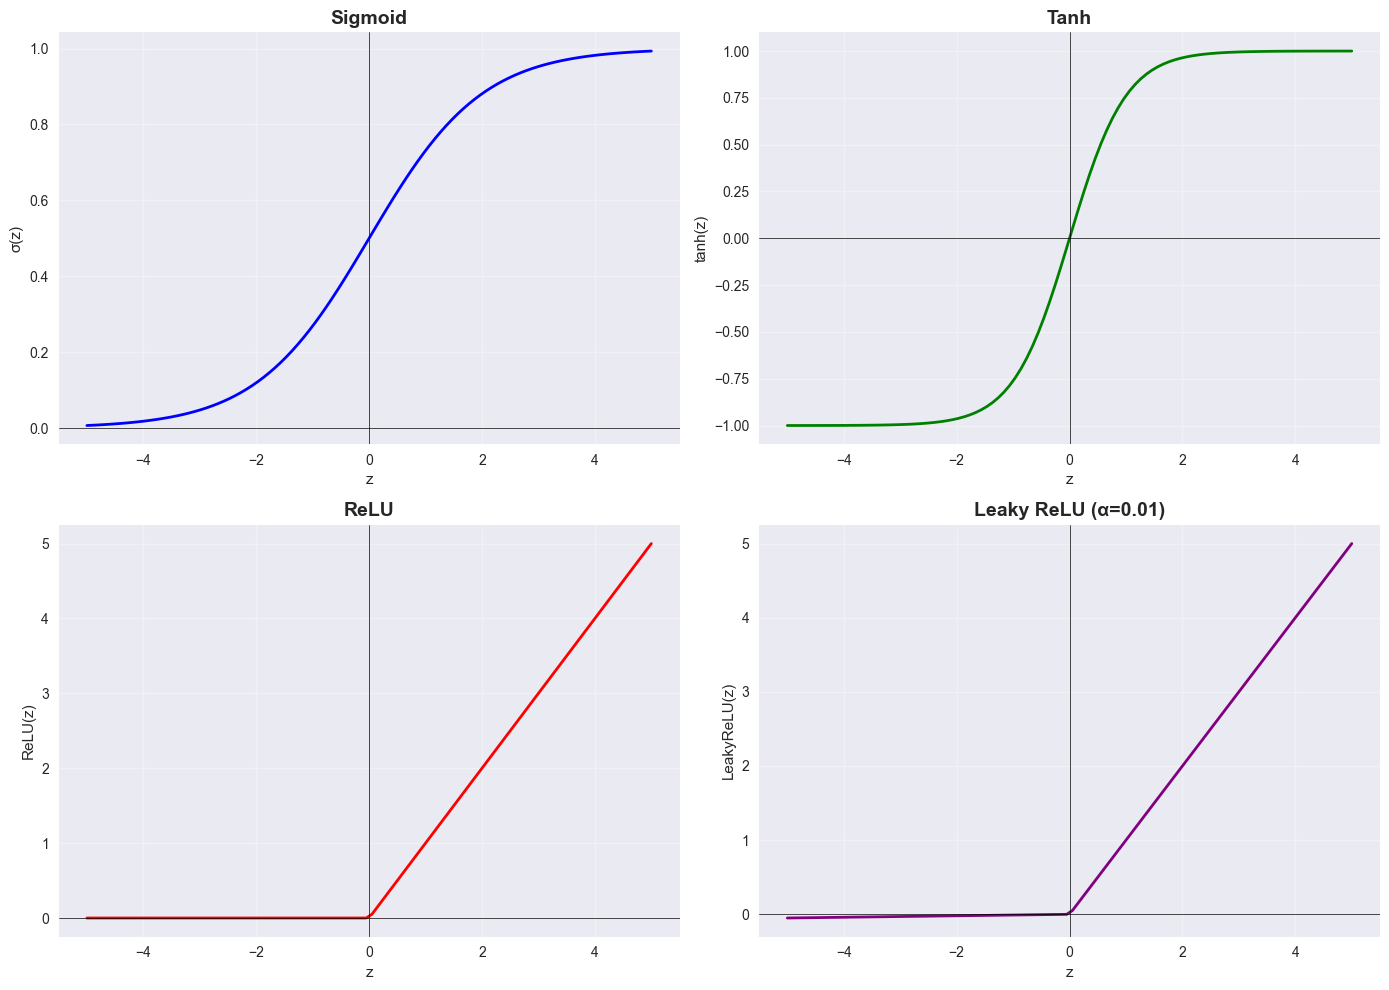

Características das funções de ativação:
Sigmoid:     Range (0, 1)     - Probabilidades
Tanh:        Range (-1, 1)    - Centrada em zero
ReLU:        Range [0, ∞)     - Eficiente, padrão atual
Leaky ReLU:  Range (-∞, ∞)    - Evita neurônios mortos


In [148]:
# Implementação e visualização das funções de ativação
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def tanh(z):
    return np.tanh(z)


def relu(z):
    return np.maximum(0, z)


def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)


# Criar intervalo de valores
z = np.linspace(-5, 5, 100)

# Plotar todas as funções
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sigmoid
axes[0, 0].plot(z, sigmoid(z), linewidth=2, color="blue")
axes[0, 0].set_title("Sigmoid", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("z")
axes[0, 0].set_ylabel("σ(z)")
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color="k", linestyle="-", linewidth=0.5)
axes[0, 0].axvline(x=0, color="k", linestyle="-", linewidth=0.5)

# Tanh
axes[0, 1].plot(z, tanh(z), linewidth=2, color="green")
axes[0, 1].set_title("Tanh", fontsize=14, fontweight="bold")
axes[0, 1].set_xlabel("z")
axes[0, 1].set_ylabel("tanh(z)")
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color="k", linestyle="-", linewidth=0.5)
axes[0, 1].axvline(x=0, color="k", linestyle="-", linewidth=0.5)

# ReLU
axes[1, 0].plot(z, relu(z), linewidth=2, color="red")
axes[1, 0].set_title("ReLU", fontsize=14, fontweight="bold")
axes[1, 0].set_xlabel("z")
axes[1, 0].set_ylabel("ReLU(z)")
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color="k", linestyle="-", linewidth=0.5)
axes[1, 0].axvline(x=0, color="k", linestyle="-", linewidth=0.5)

# Leaky ReLU
axes[1, 1].plot(z, leaky_relu(z), linewidth=2, color="purple")
axes[1, 1].set_title("Leaky ReLU (α=0.01)", fontsize=14, fontweight="bold")
axes[1, 1].set_xlabel("z")
axes[1, 1].set_ylabel("LeakyReLU(z)")
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color="k", linestyle="-", linewidth=0.5)
axes[1, 1].axvline(x=0, color="k", linestyle="-", linewidth=0.5)

plt.tight_layout()
plt.show()

print("Características das funções de ativação:")
print("=" * 60)
print("Sigmoid:     Range (0, 1)     - Probabilidades")
print("Tanh:        Range (-1, 1)    - Centrada em zero")
print("ReLU:        Range [0, ∞)     - Eficiente, padrão atual")
print("Leaky ReLU:  Range (-∞, ∞)    - Evita neurônios mortos")

## 4. Arquitetura de Redes Neurais

Uma rede neural é composta por camadas de neurônios organizadas sequencialmente.

### 4.1 Tipos de Camadas

#### Camada de Entrada (Input Layer)

- Recebe os dados brutos
- Número de neurônios = número de features
- Não tem função de ativação

#### Camadas Ocultas (Hidden Layers)

- Processam informações intermediárias
- Extraem representações hierárquicas
- Número e tamanho variáveis (hiperparâmetros)

#### Camada de Saída (Output Layer)

- Produz a predição final
- **Classificação binária**: 1 neurônio com sigmoid
- **Classificação multiclasse**: $k$ neurônios com softmax
- **Regressão**: 1 neurônio sem ativação (ou linear)

### 4.2 Multi-Layer Perceptron (MLP)

Um MLP é uma rede neural feedforward (totalmente conectada) com pelo menos uma camada oculta:

$$h^{(1)} = \phi(W^{(1)}x + b^{(1)})$$
$$h^{(2)} = \phi(W^{(2)}h^{(1)} + b^{(2)})$$
$$\vdots$$
$$\hat{y} = \phi_{out}(W^{(L)}h^{(L-1)} + b^{(L)})$$

onde:

- $W^{(l)}$ são as matrizes de pesos da camada $l$
- $b^{(l)}$ são os vetores de bias
- $\phi$ é a função de ativação
- $h^{(l)}$ são as ativações da camada $l$


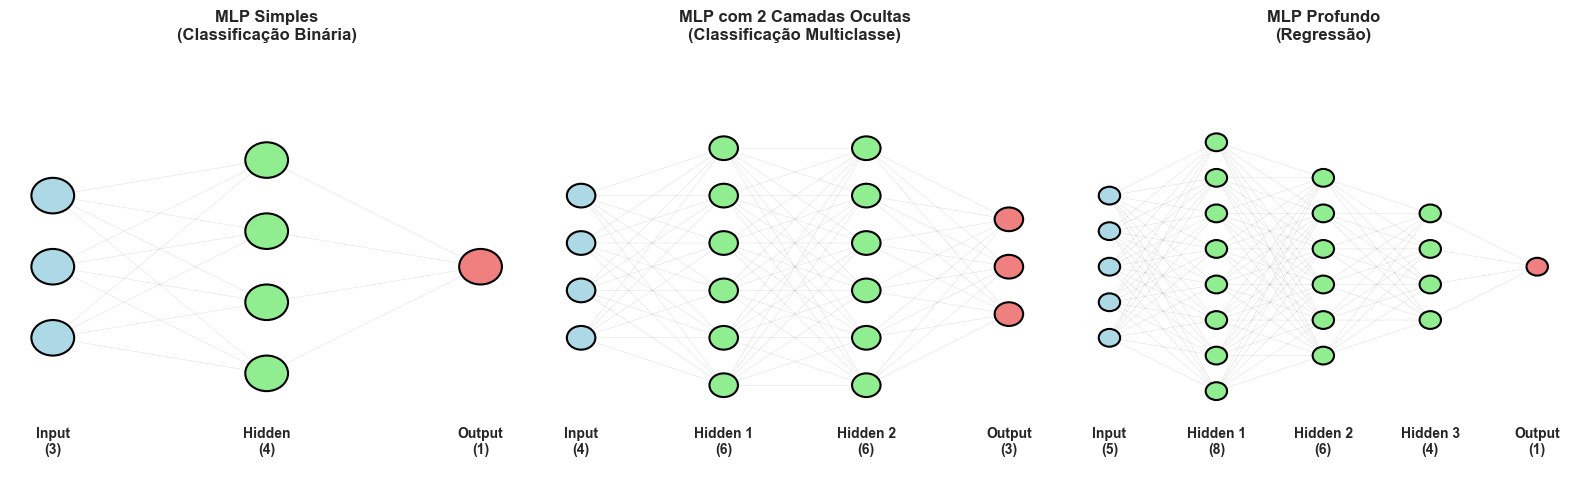

Características das arquiteturas:
Simples:   1 camada oculta  - Problemas lineares/simples
Média:     2 camadas ocultas - Problemas moderados
Profunda:  3+ camadas ocultas - Problemas complexos


In [149]:
# Visualização de diferentes arquiteturas
from matplotlib.patches import Circle, FancyArrowPatch
import matplotlib.patches as mpatches


def draw_neural_network(ax, layer_sizes, layer_labels=None):
    """
    Desenha uma rede neural com labels bem posicionadas
    layer_sizes: lista com o número de neurônios em cada camada
    layer_labels: lista com os nomes das camadas
    """
    # Espaçamento vertical e horizontal
    v_spacing = 0.8 / max(layer_sizes)  # Reduzido para dar mais espaço às labels
    h_spacing = 1.0 / (len(layer_sizes) - 1) if len(layer_sizes) > 1 else 0.5

    # Offset vertical para centralizar a rede
    y_offset = 0.1

    # Desenhar neurônios
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2.0 + y_offset
        for j in range(layer_size):
            x = i * h_spacing
            y = layer_top - j * v_spacing

            # Cor baseada na camada
            if i == 0:
                color = "lightblue"
            elif i == len(layer_sizes) - 1:
                color = "lightcoral"
            else:
                color = "lightgreen"

            circle = Circle((x, y), v_spacing / 4, color=color, ec="black", zorder=4, linewidth=1.5)
            ax.add_patch(circle)

    # Desenhar conexões
    for i in range(len(layer_sizes) - 1):
        layer_size_current = layer_sizes[i]
        layer_size_next = layer_sizes[i + 1]

        layer_top_current = v_spacing * (layer_size_current - 1) / 2.0 + y_offset
        layer_top_next = v_spacing * (layer_size_next - 1) / 2.0 + y_offset

        for j in range(layer_size_current):
            for k in range(layer_size_next):
                x1 = i * h_spacing
                y1 = layer_top_current - j * v_spacing
                x2 = (i + 1) * h_spacing
                y2 = layer_top_next - k * v_spacing

                line = FancyArrowPatch((x1, y1), (x2, y2), arrowstyle="-", color="gray", alpha=0.3, zorder=1)
                ax.add_patch(line)

    # Labels na parte inferior com espaço adequado
    if layer_labels:
        for i, label in enumerate(layer_labels):
            x = i * h_spacing
            ax.text(x, -0.35, label, ha="center", va="top", fontsize=10, fontweight="bold")

    # Definir limites com espaço para as labels
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.5, 0.7)
    ax.axis("off")


# Criar figura com diferentes arquiteturas
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Arquitetura simples
draw_neural_network(axes[0], [3, 4, 1], ["Input\n(3)", "Hidden\n(4)", "Output\n(1)"])
axes[0].set_title("MLP Simples\n(Classificação Binária)", fontsize=12, fontweight="bold", pad=10)

# Arquitetura média
draw_neural_network(axes[1], [4, 6, 6, 3], ["Input\n(4)", "Hidden 1\n(6)", "Hidden 2\n(6)", "Output\n(3)"])
axes[1].set_title("MLP com 2 Camadas Ocultas\n(Classificação Multiclasse)", fontsize=12, fontweight="bold", pad=10)

# Arquitetura profunda
draw_neural_network(
    axes[2], [5, 8, 6, 4, 1], ["Input\n(5)", "Hidden 1\n(8)", "Hidden 2\n(6)", "Hidden 3\n(4)", "Output\n(1)"]
)
axes[2].set_title("MLP Profundo\n(Regressão)", fontsize=12, fontweight="bold", pad=10)

plt.tight_layout()
plt.show()

print("Características das arquiteturas:")
print("=" * 60)
print("Simples:   1 camada oculta  - Problemas lineares/simples")
print("Média:     2 camadas ocultas - Problemas moderados")
print("Profunda:  3+ camadas ocultas - Problemas complexos")

## 5. Implementação Prática com Scikit-learn

Vamos implementar uma rede neural usando `MLPClassifier` do scikit-learn para um problema de classificação.


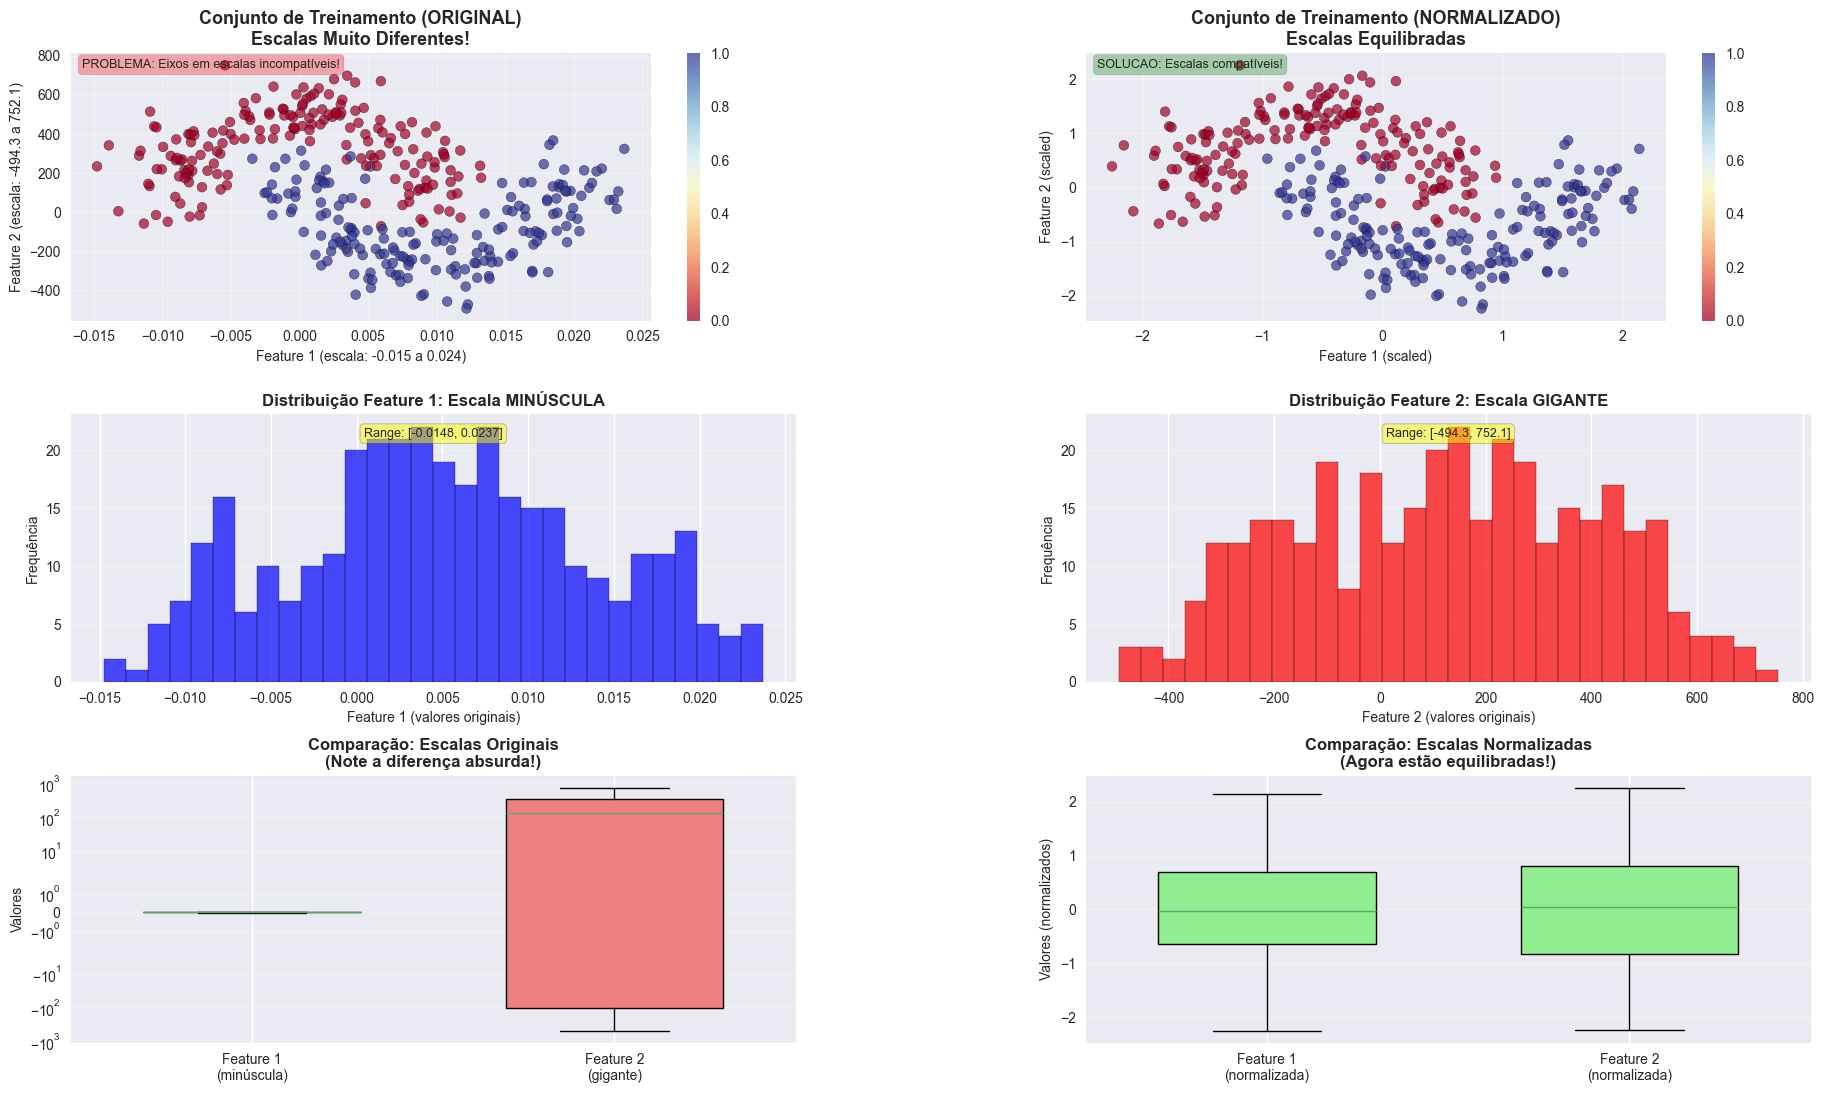

                    INFORMACOES DO DATASET
Tamanho do treino: 350 amostras
Tamanho do teste: 150 amostras
Número de features: 2
Classes: [0 1]

Distribuição de classes no treino: [175 175]
Distribuição de classes no teste: [75 75]

                    PROBLEMA DAS ESCALAS
FEATURE 1 (original):
  - Mínimo: -0.014761
  - Máximo: 0.023677
  - Média: 0.004972
  - Desvio Padrão: 0.008754
  - RANGE: 0.038439  <- MUITO PEQUENO!

FEATURE 2 (original):
  - Mínimo: -494.26
  - Máximo: 752.14
  - Média: 125.25
  - Desvio Padrão: 277.37
  - RANGE: 1246.40  <- MUITO GRANDE!

RAZAO entre os ranges: 32,426x
  -> Feature 2 tem um range 32,426x MAIOR que Feature 1!
  -> Isso causará PROBLEMAS no treinamento da rede neural!

                    SOLUCAO: NORMALIZACAO
AMBAS AS FEATURES (normalizadas):
  - Média: ~0.00 (centradas)
  - Desvio Padrão: ~1.00 (padronizadas)
  - Range: similar entre as features
  -> Agora as features estão na MESMA ESCALA!
  -> O modelo conseguirá aprender adequadamente!


In [150]:
# Criar dataset não-linear (moons) com ESCALAS MUITO DIFERENTES
X_base, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# MODIFICAR AS ESCALAS para tornar evidente a necessidade de normalização
# Feature 1: escala MINÚSCULA (multiplicar por 0.01)
# Feature 2: escala GIGANTE (multiplicar por 500)
X = X_base.copy()
X[:, 0] = X_base[:, 0] * 0.01  # Feature 1: varia entre -0.02 e 0.02
X[:, 1] = X_base[:, 1] * 500  # Feature 2: varia entre -500 e 500

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar os dados (importante para redes neurais!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualizar dataset com múltiplos aspectos
fig = plt.figure(figsize=(20, 11))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.4, left=0.08, right=0.95, top=0.95, bottom=0.05)

# Plot 1: Dataset Original (escalas diferentes)
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdYlBu", alpha=0.7, s=50, edgecolors="k")
ax1.set_title("Conjunto de Treinamento (ORIGINAL)\nEscalas Muito Diferentes!", fontsize=13, fontweight="bold")
ax1.set_xlabel(f"Feature 1 (escala: {X_train[:, 0].min():.3f} a {X_train[:, 0].max():.3f})", fontsize=10)
ax1.set_ylabel(f"Feature 2 (escala: {X_train[:, 1].min():.1f} a {X_train[:, 1].max():.1f})", fontsize=10)
plt.colorbar(scatter1, ax=ax1)
ax1.grid(True, alpha=0.3)
ax1.text(
    0.02,
    0.98,
    "PROBLEMA: Eixos em escalas incompatíveis!",
    transform=ax1.transAxes,
    fontsize=9,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="red", alpha=0.3),
)

# Plot 2: Dataset Normalizado
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap="RdYlBu", alpha=0.7, s=50, edgecolors="k"
)
ax2.set_title("Conjunto de Treinamento (NORMALIZADO)\nEscalas Equilibradas", fontsize=13, fontweight="bold")
ax2.set_xlabel("Feature 1 (scaled)", fontsize=10)
ax2.set_ylabel("Feature 2 (scaled)", fontsize=10)
plt.colorbar(scatter2, ax=ax2)
ax2.grid(True, alpha=0.3)
ax2.text(
    0.02,
    0.98,
    "SOLUCAO: Escalas compatíveis!",
    transform=ax2.transAxes,
    fontsize=9,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="green", alpha=0.3),
)

# Plot 3: Histograma Feature 1
ax3 = fig.add_subplot(gs[1, 0])
counts1, bins1, patches1 = ax3.hist(X_train[:, 0], bins=30, alpha=0.7, color="blue", edgecolor="black")
ax3.set_xlabel("Feature 1 (valores originais)", fontsize=10)
ax3.set_ylabel("Frequência", fontsize=10)
ax3.set_title("Distribuição Feature 1: Escala MINÚSCULA", fontsize=12, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")
ax3.text(
    0.5,
    0.95,
    f"Range: [{X_train[:, 0].min():.4f}, {X_train[:, 0].max():.4f}]",
    transform=ax3.transAxes,
    fontsize=9,
    ha="center",
    va="top",
    bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.5),
)

# Plot 4: Histograma Feature 2
ax4 = fig.add_subplot(gs[1, 1])
counts2, bins2, patches2 = ax4.hist(X_train[:, 1], bins=30, alpha=0.7, color="red", edgecolor="black")
ax4.set_xlabel("Feature 2 (valores originais)", fontsize=10)
ax4.set_ylabel("Frequência", fontsize=10)
ax4.set_title("Distribuição Feature 2: Escala GIGANTE", fontsize=12, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.text(
    0.5,
    0.95,
    f"Range: [{X_train[:, 1].min():.1f}, {X_train[:, 1].max():.1f}]",
    transform=ax4.transAxes,
    fontsize=9,
    ha="center",
    va="top",
    bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.5),
)

# Plot 5: Comparação de Escalas (box plot)
ax5 = fig.add_subplot(gs[2, 0])
box_data_original = [X_train[:, 0], X_train[:, 1]]
bp1 = ax5.boxplot(
    box_data_original, labels=["Feature 1\n(minúscula)", "Feature 2\n(gigante)"], patch_artist=True, widths=0.6
)
for patch in bp1["boxes"]:
    patch.set_facecolor("lightcoral")
ax5.set_ylabel("Valores", fontsize=10)
ax5.set_title("Comparação: Escalas Originais\n(Note a diferença absurda!)", fontsize=12, fontweight="bold")
ax5.grid(True, alpha=0.3, axis="y")
ax5.set_yscale("symlog")  # Escala simétrica logarítmica para visualizar ambas

# Plot 6: Comparação Normalizada
ax6 = fig.add_subplot(gs[2, 1])
box_data_scaled = [X_train_scaled[:, 0], X_train_scaled[:, 1]]
bp2 = ax6.boxplot(
    box_data_scaled, labels=["Feature 1\n(normalizada)", "Feature 2\n(normalizada)"], patch_artist=True, widths=0.6
)
for patch in bp2["boxes"]:
    patch.set_facecolor("lightgreen")
ax6.set_ylabel("Valores (normalizados)", fontsize=10)
ax6.set_title("Comparação: Escalas Normalizadas\n(Agora estão equilibradas!)", fontsize=12, fontweight="bold")
ax6.grid(True, alpha=0.3, axis="y")

plt.show()

print("=" * 80)
print("                    INFORMACOES DO DATASET")
print("=" * 80)
print(f"Tamanho do treino: {X_train.shape[0]} amostras")
print(f"Tamanho do teste: {X_test.shape[0]} amostras")
print(f"Número de features: {X_train.shape[1]}")
print(f"Classes: {np.unique(y)}")
print(f"\nDistribuição de classes no treino: {np.bincount(y_train)}")
print(f"Distribuição de classes no teste: {np.bincount(y_test)}")

print("\n" + "=" * 80)
print("                    PROBLEMA DAS ESCALAS")
print("=" * 80)
print("FEATURE 1 (original):")
print(f"  - Mínimo: {X_train[:, 0].min():.6f}")
print(f"  - Máximo: {X_train[:, 0].max():.6f}")
print(f"  - Média: {X_train[:, 0].mean():.6f}")
print(f"  - Desvio Padrão: {X_train[:, 0].std():.6f}")
print(f"  - RANGE: {X_train[:, 0].max() - X_train[:, 0].min():.6f}  <- MUITO PEQUENO!\n")

print("FEATURE 2 (original):")
print(f"  - Mínimo: {X_train[:, 1].min():.2f}")
print(f"  - Máximo: {X_train[:, 1].max():.2f}")
print(f"  - Média: {X_train[:, 1].mean():.2f}")
print(f"  - Desvio Padrão: {X_train[:, 1].std():.2f}")
print(f"  - RANGE: {X_train[:, 1].max() - X_train[:, 1].min():.2f}  <- MUITO GRANDE!\n")

ratio = (X_train[:, 1].max() - X_train[:, 1].min()) / (X_train[:, 0].max() - X_train[:, 0].min())
print(f"RAZAO entre os ranges: {ratio:,.0f}x")
print(f"  -> Feature 2 tem um range {ratio:,.0f}x MAIOR que Feature 1!")
print(f"  -> Isso causará PROBLEMAS no treinamento da rede neural!\n")

print("=" * 80)
print("                    SOLUCAO: NORMALIZACAO")
print("=" * 80)
print("AMBAS AS FEATURES (normalizadas):")
print(f"  - Média: ~0.00 (centradas)")
print(f"  - Desvio Padrão: ~1.00 (padronizadas)")
print(f"  - Range: similar entre as features")
print("  -> Agora as features estão na MESMA ESCALA!")
print("  -> O modelo conseguirá aprender adequadamente!")
print("=" * 80)

### 5.2 Treinamento do MLP

Vamos criar e treinar uma rede neural com uma camada oculta.


          EXPERIMENTO: IMPACTO DA NORMALIZACAO NO TREINAMENTO

TREINANDO MODELO SEM NORMALIZACAO...
   (usando dados com escalas muito diferentes)
   Treinamento concluído
   -> Acurácia no treino: 0.8000
   -> Acurácia no teste:  0.8200
   -> Iterações: 158
   -> Convergiu: SIM

TREINANDO MODELO COM NORMALIZACAO...
   (usando dados com escalas equilibradas)
   Treinamento concluído
   -> Acurácia no treino: 0.8657
   -> Acurácia no teste:  0.8467
   -> Iterações: 354
   -> Convergiu: SIM

                            COMPARACAO FINAL
Métrica                            Sem Normalização     Com Normalização
--------------------------------------------------------------------------------
Acurácia Treino                             80.00%               86.57%
Acurácia Teste                              82.00%               84.67%
N° Iterações                                    158                  354
Loss Final                                 0.348432             0.273950
----------------

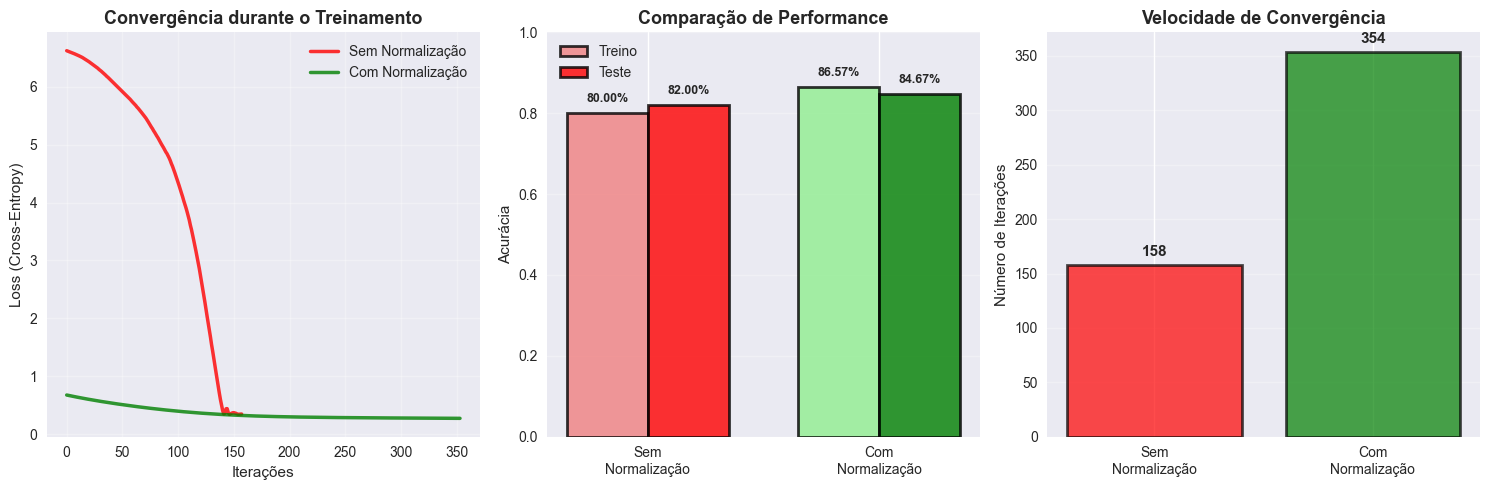


CONCLUSAO:
   A normalização é ESSENCIAL quando as features têm escalas muito diferentes!
   Sem ela, o modelo pode:
   - Convergir mais lentamente (ou não convergir)
   - Ter performance inferior
   - Ser instável durante o treinamento


In [151]:
# Criar e treinar MLP - COMPARACAO: SEM vs COM normalização

print("=" * 80)
print("          EXPERIMENTO: IMPACTO DA NORMALIZACAO NO TREINAMENTO")
print("=" * 80)

# MODELO 1: SEM NORMALIZACAO (dados originais com escalas diferentes)
print("\nTREINANDO MODELO SEM NORMALIZACAO...")
print("   (usando dados com escalas muito diferentes)")
mlp_sem_norm = MLPClassifier(
    hidden_layer_sizes=(10,),  # 1 camada oculta com 10 neurônios
    activation="relu",  # Função de ativação ReLU
    solver="adam",  # Otimizador Adam
    max_iter=1000,  # Número máximo de iterações
    random_state=42,
    verbose=False,
)

mlp_sem_norm.fit(X_train, y_train)  # <- Usando dados SEM normalização

train_score_sem = mlp_sem_norm.score(X_train, y_train)
test_score_sem = mlp_sem_norm.score(X_test, y_test)

print(f"   Treinamento concluído")
print(f"   -> Acurácia no treino: {train_score_sem:.4f}")
print(f"   -> Acurácia no teste:  {test_score_sem:.4f}")
print(f"   -> Iterações: {mlp_sem_norm.n_iter_}")
print(f"   -> Convergiu: {'SIM' if mlp_sem_norm.n_iter_ < 1000 else 'NAO - atingiu limite!'}")

# MODELO 2: COM NORMALIZACAO
print("\nTREINANDO MODELO COM NORMALIZACAO...")
print("   (usando dados com escalas equilibradas)")
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),  # 1 camada oculta com 10 neurônios
    activation="relu",  # Função de ativação ReLU
    solver="adam",  # Otimizador Adam
    max_iter=1000,  # Número máximo de iterações
    random_state=42,
    verbose=False,
)

mlp.fit(X_train_scaled, y_train)  # <- Usando dados COM normalização

train_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)

print(f"   Treinamento concluído")
print(f"   -> Acurácia no treino: {train_score:.4f}")
print(f"   -> Acurácia no teste:  {test_score:.4f}")
print(f"   -> Iterações: {mlp.n_iter_}")
print(f"   -> Convergiu: {'SIM' if mlp.n_iter_ < 1000 else 'NAO - atingiu limite!'}")

# COMPARACAO
print("\n" + "=" * 80)
print("                            COMPARACAO FINAL")
print("=" * 80)
print(f"{'Métrica':<30} {'Sem Normalização':>20} {'Com Normalização':>20}")
print("-" * 80)
print(f"{'Acurácia Treino':<30} {train_score_sem:>19.2%} {train_score:>20.2%}")
print(f"{'Acurácia Teste':<30} {test_score_sem:>19.2%} {test_score:>20.2%}")
print(f"{'N° Iterações':<30} {mlp_sem_norm.n_iter_:>20d} {mlp.n_iter_:>20d}")

if hasattr(mlp_sem_norm, "loss_curve_") and hasattr(mlp, "loss_curve_"):
    print(f"{'Loss Final':<30} {mlp_sem_norm.loss_curve_[-1]:>20.6f} {mlp.loss_curve_[-1]:>20.6f}")

print("-" * 80)
diff_test = test_score - test_score_sem
diff_iter = mlp_sem_norm.n_iter_ - mlp.n_iter_
print(f"{'MELHORIA':<30} {diff_test:>19.2%} {diff_iter:>17d} iter a menos")
print("=" * 80)

# Visualização comparativa
if hasattr(mlp_sem_norm, "loss_curve_") and hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(15, 5))

    # Curvas de perda
    plt.subplot(1, 3, 1)
    plt.plot(mlp_sem_norm.loss_curve_, linewidth=2.5, color="red", label="Sem Normalização", alpha=0.8)
    plt.plot(mlp.loss_curve_, linewidth=2.5, color="green", label="Com Normalização", alpha=0.8)
    plt.xlabel("Iterações", fontsize=11)
    plt.ylabel("Loss (Cross-Entropy)", fontsize=11)
    plt.title("Convergência durante o Treinamento", fontsize=13, fontweight="bold")
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # Comparação de acurácias
    plt.subplot(1, 3, 2)
    categories = ["Sem\nNormalização", "Com\nNormalização"]
    test_accs = [test_score_sem, test_score]
    train_accs = [train_score_sem, train_score]

    x = np.arange(len(categories))
    width = 0.35

    bars1 = plt.bar(
        x - width / 2,
        train_accs,
        width,
        label="Treino",
        color=["lightcoral", "lightgreen"],
        edgecolor="black",
        linewidth=2,
        alpha=0.8,
    )
    bars2 = plt.bar(
        x + width / 2,
        test_accs,
        width,
        label="Teste",
        color=["red", "green"],
        edgecolor="black",
        linewidth=2,
        alpha=0.8,
    )

    plt.ylabel("Acurácia", fontsize=11)
    plt.title("Comparação de Performance", fontsize=13, fontweight="bold")
    plt.xticks(x, categories)
    plt.ylim([0, 1])
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3, axis="y")

    # Adicionar valores nas barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height + 0.02,
                f"{height:.2%}",
                ha="center",
                va="bottom",
                fontsize=9,
                fontweight="bold",
            )

    # Iterações até convergência
    plt.subplot(1, 3, 3)
    iters = [mlp_sem_norm.n_iter_, mlp.n_iter_]
    colors_iter = ["red", "green"]
    bars_iter = plt.bar(categories, iters, color=colors_iter, edgecolor="black", linewidth=2, alpha=0.7)
    plt.ylabel("Número de Iterações", fontsize=11)
    plt.title("Velocidade de Convergência", fontsize=13, fontweight="bold")
    plt.grid(True, alpha=0.3, axis="y")

    # Adicionar valores nas barras
    for bar, iter_val in zip(bars_iter, iters):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 5,
            f"{iter_val}",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold",
        )

    plt.tight_layout()
    plt.show()

print("\nCONCLUSAO:")
print("   A normalização é ESSENCIAL quando as features têm escalas muito diferentes!")
print("   Sem ela, o modelo pode:")
print("   - Convergir mais lentamente (ou não convergir)")
print("   - Ter performance inferior")
print("   - Ser instável durante o treinamento")

### 5.3 Visualização da Fronteira de Decisão

Vamos visualizar como a rede neural separa as classes no espaço de features.


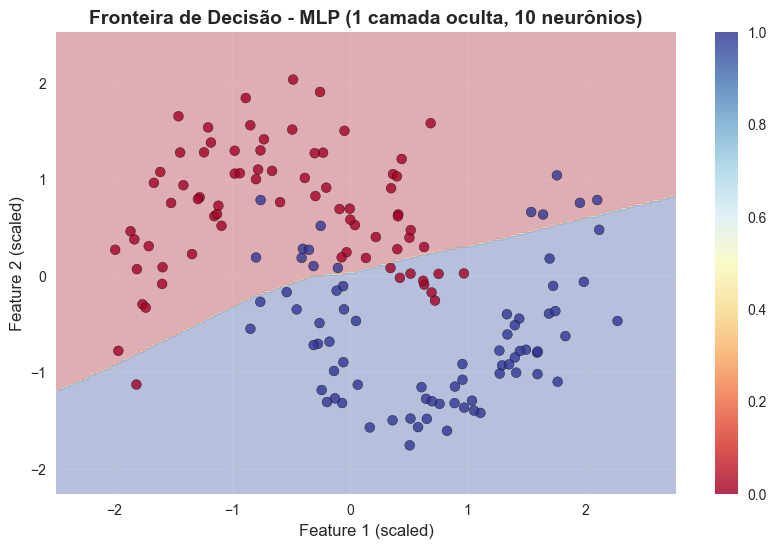

In [152]:
# Função para plotar fronteira de decisão
def plot_decision_boundary(model, X, y, title):
    """Plota a fronteira de decisão de um classificador"""
    h = 0.02  # step size no mesh

    # Criar um mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predizer para cada ponto do mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdYlBu")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", edgecolors="k", s=50, alpha=0.8)
    plt.xlabel("Feature 1 (scaled)", fontsize=12)
    plt.ylabel("Feature 2 (scaled)", fontsize=12)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    plt.show()


# Visualizar fronteira de decisão
plot_decision_boundary(mlp, X_test_scaled, y_test, "Fronteira de Decisão - MLP (1 camada oculta, 10 neurônios)")

## 6. Comparação de Diferentes Arquiteturas

Vamos comparar o desempenho de redes neurais com diferentes configurações de camadas ocultas.

### Impacto do Número de Neurônios

A quantidade de neurônios nas camadas ocultas afeta:

- **Capacidade de aprendizado**: mais neurônios = maior capacidade
- **Risco de overfitting**: muitos neurônios podem decorar os dados
- **Tempo de treinamento**: mais neurônios = mais computação


Comparação de Arquiteturas:
 Arquitetura  Acurácia Treino  Acurácia Teste  N° Parâmetros  Iterações
        (5,)         0.857143        0.873333             21        746
       (10,)         0.865714        0.846667             41        354
       (20,)         0.940000        0.953333             81       1000
    (10, 10)         0.982857        0.986667            151        710
    (20, 10)         0.980000        0.986667            281        597
(50, 25, 10)         0.988571        0.966667           1696        401


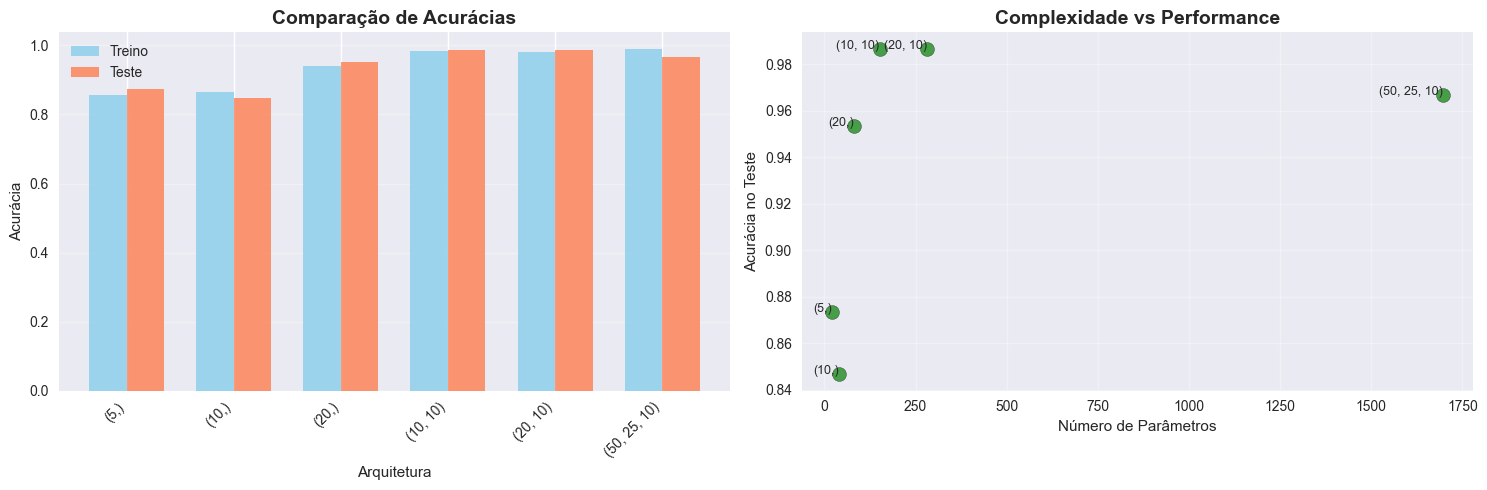

In [153]:
# Comparação de diferentes arquiteturas
architectures = [
    (5,),  # 1 camada com 5 neurônios
    (10,),  # 1 camada com 10 neurônios
    (20,),  # 1 camada com 20 neurônios
    (10, 10),  # 2 camadas com 10 neurônios cada
    (20, 10),  # 2 camadas decrescentes
    (50, 25, 10),  # 3 camadas decrescentes
]

results = []

for arch in architectures:
    # Treinar modelo
    model = MLPClassifier(
        hidden_layer_sizes=arch, activation="relu", solver="adam", max_iter=1000, random_state=42, verbose=False
    )

    model.fit(X_train_scaled, y_train)

    # Avaliar
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)

    # Calcular número total de parâmetros
    n_params = sum([w.size for w in model.coefs_]) + sum([b.size for b in model.intercepts_])

    results.append(
        {
            "Arquitetura": str(arch),
            "Acurácia Treino": train_acc,
            "Acurácia Teste": test_acc,
            "N° Parâmetros": n_params,
            "Iterações": model.n_iter_,
        }
    )

# Criar DataFrame com resultados
results_df = pd.DataFrame(results)
print("Comparação de Arquiteturas:")
print("=" * 80)
print(results_df.to_string(index=False))

# Visualizar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de acurácias
x_pos = np.arange(len(results_df))
width = 0.35

axes[0].bar(x_pos - width / 2, results_df["Acurácia Treino"], width, label="Treino", alpha=0.8, color="skyblue")
axes[0].bar(x_pos + width / 2, results_df["Acurácia Teste"], width, label="Teste", alpha=0.8, color="coral")
axes[0].set_xlabel("Arquitetura")
axes[0].set_ylabel("Acurácia")
axes[0].set_title("Comparação de Acurácias", fontsize=14, fontweight="bold")
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(results_df["Arquitetura"], rotation=45, ha="right")
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis="y")

# Gráfico de parâmetros vs acurácia teste
axes[1].scatter(results_df["N° Parâmetros"], results_df["Acurácia Teste"], s=100, alpha=0.7, c="green", edgecolors="k")
for i, arch in enumerate(results_df["Arquitetura"]):
    axes[1].annotate(arch, (results_df["N° Parâmetros"][i], results_df["Acurácia Teste"][i]), fontsize=9, ha="right")
axes[1].set_xlabel("Número de Parâmetros")
axes[1].set_ylabel("Acurácia no Teste")
axes[1].set_title("Complexidade vs Performance", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Curva de Aprendizado

A curva de aprendizado mostra como a perda diminui durante o treinamento. É útil para diagnosticar problemas de convergência.


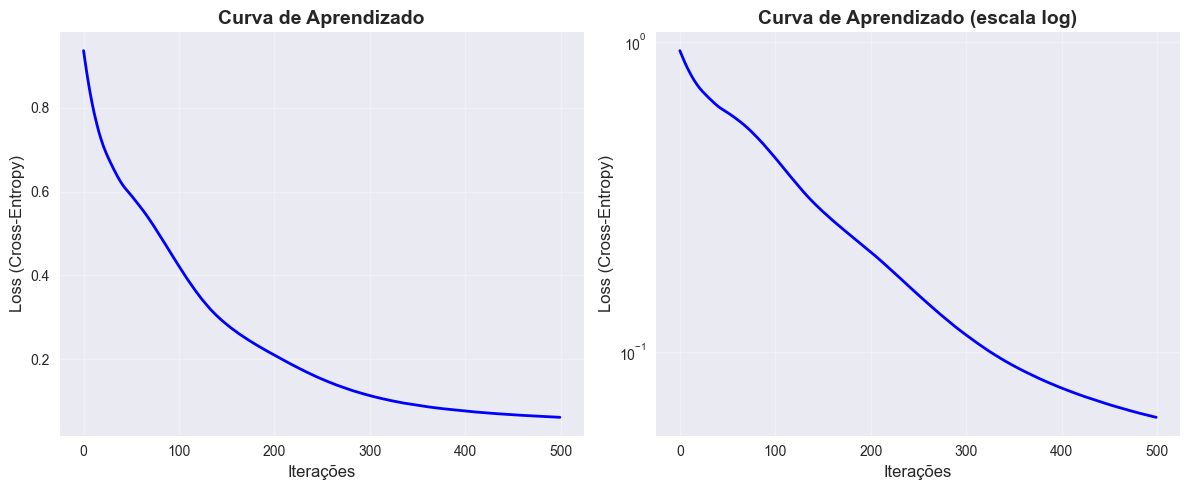

Informações do Treinamento:
Perda inicial: 0.935960
Perda final: 0.061370
Redução: 93.44%
Convergiu em 500 iterações


In [154]:
# Treinar modelo com verbose para capturar curva de aprendizado
mlp_verbose = MLPClassifier(
    hidden_layer_sizes=(20, 10), activation="relu", solver="adam", max_iter=500, random_state=42, verbose=False
)

mlp_verbose.fit(X_train_scaled, y_train)

# Plotar curva de perda
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp_verbose.loss_curve_, linewidth=2, color="blue")
plt.xlabel("Iterações", fontsize=12)
plt.ylabel("Loss (Cross-Entropy)", fontsize=12)
plt.title("Curva de Aprendizado", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(mlp_verbose.loss_curve_, linewidth=2, color="blue")
plt.xlabel("Iterações", fontsize=12)
plt.ylabel("Loss (Cross-Entropy)", fontsize=12)
plt.title("Curva de Aprendizado (escala log)", fontsize=14, fontweight="bold")
plt.yscale("log")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Informações do Treinamento:")
print("=" * 60)
print(f"Perda inicial: {mlp_verbose.loss_curve_[0]:.6f}")
print(f"Perda final: {mlp_verbose.loss_curve_[-1]:.6f}")
print(f"Redução: {(1 - mlp_verbose.loss_curve_[-1]/mlp_verbose.loss_curve_[0])*100:.2f}%")
print(f"Convergiu em {mlp_verbose.n_iter_} iterações")

## 8. Principais Hiperparâmetros

Ao trabalhar com redes neurais, é importante entender os principais hiperparâmetros que podem ser ajustados.

### Hiperparâmetros Essenciais

1. **hidden_layer_sizes**: Arquitetura da rede (número e tamanho das camadas ocultas)

   - Exemplo: `(100,)` = 1 camada com 100 neurônios
   - Exemplo: `(50, 25)` = 2 camadas com 50 e 25 neurônios

2. **activation**: Função de ativação

   - `'relu'`: ReLU (padrão, recomendado)
   - `'tanh'`: Tangente hiperbólica
   - `'logistic'`: Sigmoid

3. **solver**: Algoritmo de otimização

   - `'adam'`: Adam optimizer (padrão, adaptativo)
   - `'sgd'`: Stochastic Gradient Descent
   - `'lbfgs'`: L-BFGS (bom para datasets pequenos)

4. **learning_rate_init**: Taxa de aprendizado inicial (padrão: 0.001)

5. **max_iter**: Número máximo de iterações (padrão: 200)

6. **alpha**: Parâmetro de regularização L2 (padrão: 0.0001)


Comparação de Funções de Ativação:
Ativação Acurácia Treino Acurácia Teste  Iterações
    relu          0.9800         0.9867        500
    tanh          0.9514         0.9867        500
logistic          0.8571         0.8533        500


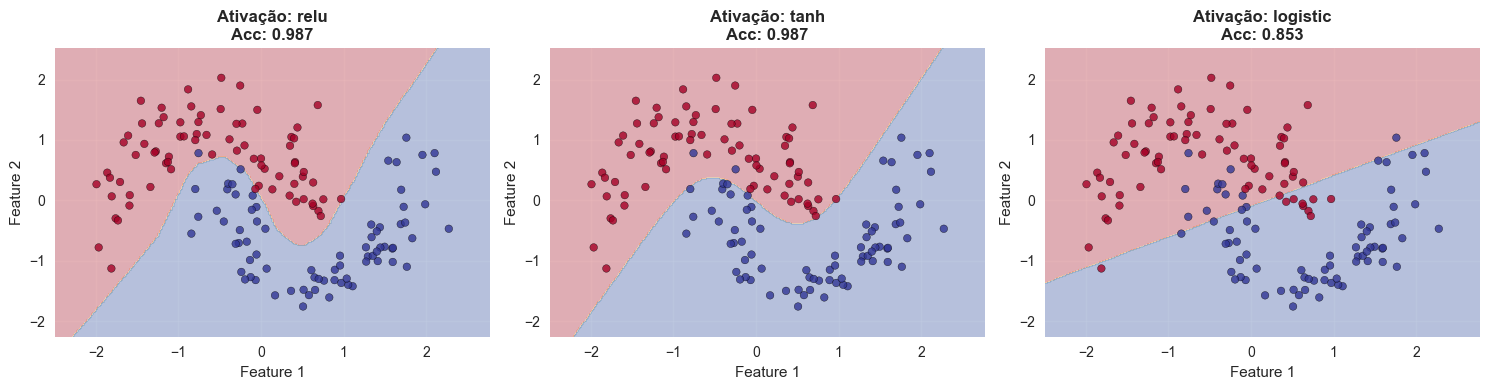

In [155]:
# Comparação de diferentes funções de ativação
activations = ["relu", "tanh", "logistic"]
activation_results = []

for activation in activations:
    model = MLPClassifier(
        hidden_layer_sizes=(20, 10), activation=activation, solver="adam", max_iter=500, random_state=42, verbose=False
    )

    model.fit(X_train_scaled, y_train)

    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)

    activation_results.append(
        {
            "Ativação": activation,
            "Acurácia Treino": f"{train_acc:.4f}",
            "Acurácia Teste": f"{test_acc:.4f}",
            "Iterações": model.n_iter_,
        }
    )

# Exibir resultados
results_activation_df = pd.DataFrame(activation_results)
print("Comparação de Funções de Ativação:")
print("=" * 60)
print(results_activation_df.to_string(index=False))

# Visualização
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, activation in enumerate(activations):
    model = MLPClassifier(
        hidden_layer_sizes=(20, 10), activation=activation, solver="adam", max_iter=500, random_state=42, verbose=False
    )

    model.fit(X_train_scaled, y_train)

    # Criar mesh para fronteira de decisão
    h = 0.02
    x_min, x_max = X_test_scaled[:, 0].min() - 0.5, X_test_scaled[:, 0].max() + 0.5
    y_min, y_max = X_test_scaled[:, 1].min() - 0.5, X_test_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap="RdYlBu")
    scatter = axes[idx].scatter(
        X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap="RdYlBu", edgecolors="k", s=30, alpha=0.8
    )
    axes[idx].set_title(
        f"Ativação: {activation}\nAcc: {model.score(X_test_scaled, y_test):.3f}", fontsize=12, fontweight="bold"
    )
    axes[idx].set_xlabel("Feature 1")
    axes[idx].set_ylabel("Feature 2")
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Boas Práticas com Redes Neurais

### Recomendações

1. **Normalização de Dados**

   - **SEMPRE** normalize/padronize os dados de entrada
   - Redes neurais são sensíveis à escala das features
   - Use `StandardScaler` ou `MinMaxScaler`

2. **Escolha de Função de Ativação**

   - Camadas ocultas: **ReLU** (padrão, mais eficiente)
   - Saída binária: **Sigmoid**
   - Saída multiclasse: **Softmax**

3. **Arquitetura Inicial**

   - Comece simples: 1-2 camadas ocultas
   - Número de neurônios: entre o tamanho de entrada e saída
   - Aumente gradualmente se necessário

4. **Regularização**

   - Use `alpha` (L2 regularization) para prevenir overfitting
   - Valores típicos: 0.0001 a 0.01

5. **Treinamento**
   - Monitore a curva de perda
   - Se não convergir: aumente `max_iter` ou ajuste `learning_rate_init`
   - Use `early_stopping=True` para evitar overfitting

### Armadilhas Comuns

1. **Não normalizar os dados** - convergência lenta ou falha
2. **Muitos neurônios/camadas** - overfitting
3. **Poucos neurônios/camadas** - underfitting
4. **Taxa de aprendizado alta** - instabilidade
5. **Taxa de aprendizado baixa** - convergência muito lenta


Estatísticas das Features (Escalas Muito Diferentes):
Feature          Min         Max      Mean         Std
     F1    -0.032413    0.038527 -0.000385    0.010342
     F2 -2471.644500 3078.880808 71.791163  974.630782
     F3    -0.265097    0.263238  0.016592    0.101016
     F4 -1448.127689 1219.876203 70.816313  518.349774
     F5    -0.002591    0.002602 -0.000004    0.000993
     F6 -5842.700967 6386.215136 45.171004 1982.764381
     F7    -1.509756    1.379830 -0.020402    0.479377
     F8  -260.421386  310.991856 -0.965254   97.248918

PROBLEMA: Features com escalas de 0.001 até 2000!
   Isso causa gradientes instáveis e dificulta o aprendizado.

Comparação: Boas Práticas vs Más Práticas

MÁ PRÁTICA: Sem normalização dos dados
   Acurácia no teste: 0.9333
   Iterações até convergência: 200
   Convergiu: NÃO
   Loss final: 0.185102

BOA PRÁTICA: Com normalização dos dados
   Acurácia no teste: 1.0000
   Iterações até convergência: 200
   Convergiu: NÃO
   Loss final: 0.106445

I

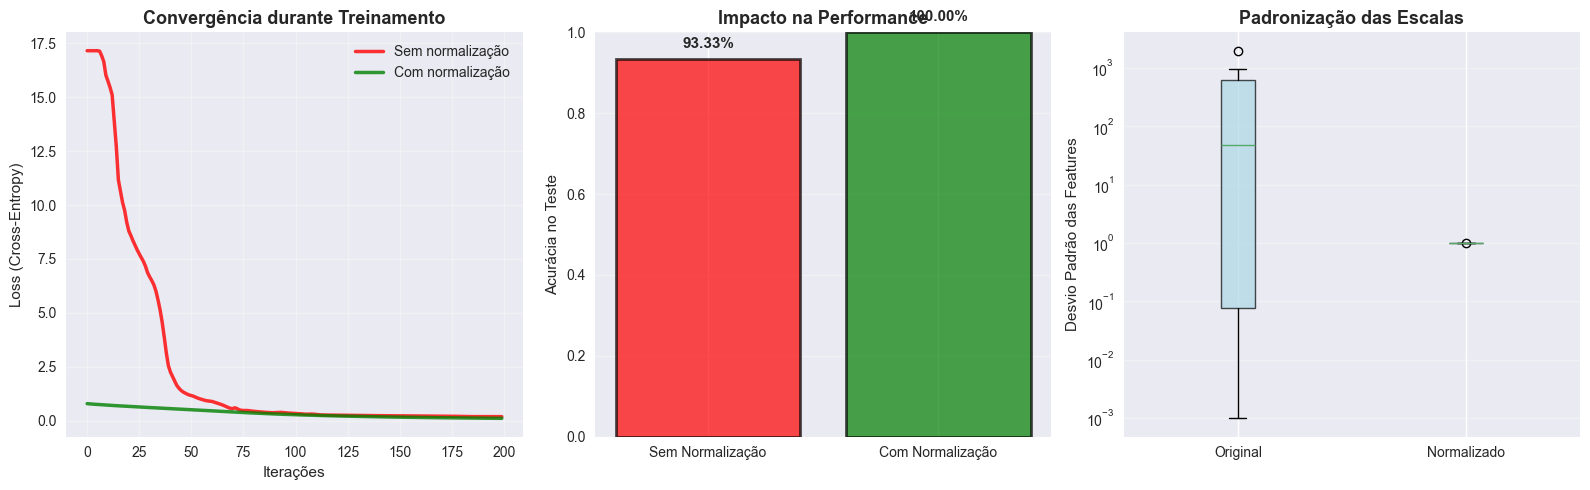


CONCLUSÃO:
   Quando as features têm escalas muito diferentes (0.001 a 2000),
   a normalização é ESSENCIAL para:
   - Convergência mais rápida
   - Melhor performance final
   - Estabilidade numérica durante o treinamento


In [156]:
# Demonstração de boas práticas vs más práticas

# Dataset de exemplo com escalas MUITO diferentes (crítico para demonstrar importância da normalização)
np.random.seed(42)
n_samples = 300

# Criar features com escalas drasticamente diferentes
X_demo = np.column_stack(
    [
        np.random.randn(n_samples) * 0.01,  # Feature 1: escala muito pequena (0.01)
        np.random.randn(n_samples) * 1000,  # Feature 2: escala muito grande (1000)
        np.random.randn(n_samples) * 0.1,  # Feature 3: escala pequena (0.1)
        np.random.randn(n_samples) * 500,  # Feature 4: escala grande (500)
        np.random.randn(n_samples) * 0.001,  # Feature 5: escala minúscula (0.001)
        np.random.randn(n_samples) * 2000,  # Feature 6: escala enorme (2000)
        np.random.randn(n_samples) * 0.5,  # Feature 7: escala média-pequena
        np.random.randn(n_samples) * 100,  # Feature 8: escala média-grande
    ]
)

# Criar target baseado em combinação linear + não-linearidade
linear_combination = (
    X_demo[:, 0] * 100  # Compensar escala pequena
    + X_demo[:, 1] * 0.01  # Compensar escala grande
    + X_demo[:, 2] * 10
    + X_demo[:, 3] * 0.02
    + X_demo[:, 4] * 1000
    + X_demo[:, 5] * 0.005
)
y_demo = (linear_combination + np.random.randn(n_samples) * 0.5 > np.median(linear_combination)).astype(int)

X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(X_demo, y_demo, test_size=0.3, random_state=42)

# Mostrar estatísticas das features para evidenciar o problema
print("Estatísticas das Features (Escalas Muito Diferentes):")
print("=" * 70)
feature_stats = pd.DataFrame(
    {
        "Feature": [f"F{i+1}" for i in range(X_train_demo.shape[1])],
        "Min": X_train_demo.min(axis=0),
        "Max": X_train_demo.max(axis=0),
        "Mean": X_train_demo.mean(axis=0),
        "Std": X_train_demo.std(axis=0),
    }
)
print(feature_stats.to_string(index=False))
print("\nPROBLEMA: Features com escalas de 0.001 até 2000!")
print("   Isso causa gradientes instáveis e dificulta o aprendizado.\n")

print("Comparação: Boas Práticas vs Más Práticas")
print("=" * 70)

# Má prática: sem normalização
print("\nMÁ PRÁTICA: Sem normalização dos dados")
mlp_bad = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=200, random_state=42, verbose=False)
mlp_bad.fit(X_train_demo, y_train_demo)
print(f"   Acurácia no teste: {mlp_bad.score(X_test_demo, y_test_demo):.4f}")
print(f"   Iterações até convergência: {mlp_bad.n_iter_}")
print(f"   Convergiu: {'SIM' if mlp_bad.n_iter_ < 200 else 'NÃO'}")
if hasattr(mlp_bad, "loss_curve_"):
    print(f"   Loss final: {mlp_bad.loss_curve_[-1]:.6f}")

# Boa prática: com normalização
print("\nBOA PRÁTICA: Com normalização dos dados")
scaler_demo = StandardScaler()
X_train_demo_scaled = scaler_demo.fit_transform(X_train_demo)
X_test_demo_scaled = scaler_demo.transform(X_test_demo)

mlp_good = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=200, random_state=42, verbose=False)
mlp_good.fit(X_train_demo_scaled, y_train_demo)
print(f"   Acurácia no teste: {mlp_good.score(X_test_demo_scaled, y_test_demo):.4f}")
print(f"   Iterações até convergência: {mlp_good.n_iter_}")
print(f"   Convergiu: {'SIM' if mlp_good.n_iter_ < 200 else 'NÃO'}")
if hasattr(mlp_good, "loss_curve_"):
    print(f"   Loss final: {mlp_good.loss_curve_[-1]:.6f}")

# Resumo da diferença
print("\n" + "=" * 70)
print("IMPACTO DA NORMALIZAÇÃO:")
acc_diff = mlp_good.score(X_test_demo_scaled, y_test_demo) - mlp_bad.score(X_test_demo, y_test_demo)
print(f"   Melhoria na acurácia: {acc_diff:+.2%}")
print(f"   Redução nas iterações: {mlp_bad.n_iter_ - mlp_good.n_iter_} iterações")
print("=" * 70)

# Visualizar curvas de perda e comparação
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico 1: Curvas de perda
axes[0].plot(mlp_bad.loss_curve_, linewidth=2.5, color="red", label="Sem normalização", alpha=0.8)
axes[0].plot(mlp_good.loss_curve_, linewidth=2.5, color="green", label="Com normalização", alpha=0.8)
axes[0].set_xlabel("Iterações", fontsize=11)
axes[0].set_ylabel("Loss (Cross-Entropy)", fontsize=11)
axes[0].set_title("Convergência durante Treinamento", fontsize=13, fontweight="bold")
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Comparação de acurácias
categories = ["Sem Normalização", "Com Normalização"]
test_accs = [mlp_bad.score(X_test_demo, y_test_demo), mlp_good.score(X_test_demo_scaled, y_test_demo)]
colors = ["red", "green"]
bars = axes[1].bar(categories, test_accs, color=colors, alpha=0.7, edgecolor="black", linewidth=2)
axes[1].set_ylabel("Acurácia no Teste", fontsize=11)
axes[1].set_title("Impacto na Performance", fontsize=13, fontweight="bold")
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3, axis="y")
# Adicionar valores nas barras
for bar, acc in zip(bars, test_accs):
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{acc:.2%}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

# Gráfico 3: Comparação de escalas (antes e depois)
axes[2].boxplot(
    [X_train_demo.std(axis=0), X_train_demo_scaled.std(axis=0)],
    tick_labels=["Original", "Normalizado"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", alpha=0.7),
)
axes[2].set_ylabel("Desvio Padrão das Features", fontsize=11)
axes[2].set_title("Padronização das Escalas", fontsize=13, fontweight="bold")
axes[2].set_yscale("log")
axes[2].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("CONCLUSÃO:")
print("   Quando as features têm escalas muito diferentes (0.001 a 2000),")
print("   a normalização é ESSENCIAL para:")
print("   - Convergência mais rápida")
print("   - Melhor performance final")
print("   - Estabilidade numérica durante o treinamento")
print("=" * 70)

## 10. Resumo da Aula

### Conceitos Principais

**Redes Neurais Artificiais** são modelos computacionais inspirados no cérebro, compostos por camadas de neurônios interconectados que aprendem representações complexas dos dados.

### Pontos-Chave

1. **Neurônio Artificial**: Unidade básica que aplica pesos às entradas, soma, adiciona bias e passa por uma função de ativação

2. **Funções de Ativação**: Introduzem não-linearidade

   - ReLU: padrão para camadas ocultas
   - Sigmoid: saída binária
   - Tanh: alternativa ao sigmoid
   - Softmax: saída multiclasse

3. **Arquitetura MLP**:

   - Camada de entrada (features)
   - Camadas ocultas (aprendizado de representações)
   - Camada de saída (predições)

4. **Hiperparâmetros Importantes**:

   - `hidden_layer_sizes`: arquitetura da rede
   - `activation`: função de ativação
   - `solver`: algoritmo de otimização
   - `alpha`: regularização L2
   - `learning_rate_init`: taxa de aprendizado

5. **Boas Práticas**:
   - SEMPRE normalizar os dados
   - Começar com arquiteturas simples
   - Usar ReLU nas camadas ocultas
   - Monitorar curvas de aprendizado
   - Aplicar regularização para evitar overfitting

### Fórmula Geral

$$\hat{y} = f(x; \theta) = \phi_L\left(W^{(L)} \cdot \phi_{L-1}\left(W^{(L-1)} \cdot \ldots \phi_1(W^{(1)}x + b^{(1)}) \ldots + b^{(L-1)}\right) + b^{(L)}\right)$$
